# Pyber

* Rural trips are the most likely to result in high fares
* The majority of fares (62.7%), rides(68.4%), and drivers(80.9%) are within Urban cities
* The minority of fares (6.8%), rides(5.3%), and drivers(2.6%) are within Rural cities

* You must include a written description of three observable trends based on the data.

In [1]:
#my solution
%matplotlib inline

# dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

# define filepaths
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# read city and ride files and convert to dataframes
city = pd.read_csv(city_data)
ride = pd.read_csv(ride_data)
citydf = pd.DataFrame(city)
ridedf = pd.DataFrame(ride)

# Combine the data into a single dataset
df = pd.merge(ridedf, citydf, on="city", how="outer")

# Display the data table for preview
df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [2]:
# define colors for each type
colors = [{'type':'Rural','Color':'gold'}, 
          {'type':'Suburban','Color':'lightskyblue'}, 
          {'type':'Urban','Color':'coral'}]

# convert color dictionary to a df
colorsdf = pd.DataFrame(colors)

# merge city df with color dictionary df
citydf2 = pd.merge(citydf, colorsdf, on="type")
citydf2.head()

,city,driver_count,type,Color
0,Richardfort,38,Urban,coral
1,Williamsstad,59,Urban,coral
2,Port Angela,67,Urban,coral
3,Rodneyfort,34,Urban,coral
4,West Robert,39,Urban,coral


## Bubble Plot of Ride Sharing Data

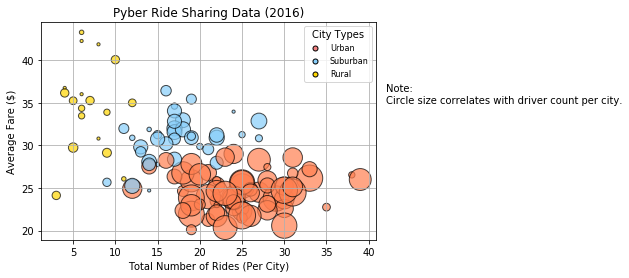

In [4]:
# create a summary table of # of rides per city & convert to df
rides_per_city = df.groupby('city')['ride_id'].nunique()
RPC = pd.DataFrame(rides_per_city)

# create a summary table of average fare per city & convert to df
avg_fare_per_city = df.groupby('city')['fare'].mean()
AFPC = pd.DataFrame(avg_fare_per_city)

# create a new df out of the rides and average fares per city dfs
df2 = pd.merge(RPC, AFPC, on="city")

# merge once more to assign drivers per city
df3 = pd.merge(df2, citydf2, on="city")
df3 = df3.set_index('city')

#rename columns
df3.columns = [
    'Ride_Count',
    'Average_Fare',
    'Driver_Count',
    'Type',
    'Type_Color'
]

# build plot
df3.plot(kind="scatter", 
         x="Ride_Count", 
         y="Average_Fare", 
         s = (df3.Driver_Count*10), 
         c=df3.Type_Color,
         grid=True, 
         alpha=0.7, 
         edgecolors="black", 
         title="Pyber Ride Sharing Data (2016)")

# set graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.text(42,35,'Note:\nCircle size correlates with driver count per city.')

# set legend properties
colors = ["lightcoral","lightskyblue","gold"]
city_types = ["Urban","Suburban","Rural"]
patches = [ plt.plot([],[], 
                     marker="o", 
                     ms=5, 
                     ls="", 
                     mec='k', 
                     color=colors[i], 
                     label="{:s}".format(city_types[i]) )
           [0]  for i in range(len(city_types)) ]
plt.legend(handles=patches, 
           title="City Types",
           loc='upper right', 
           fontsize=8,
           numpoints=1 )

# show plot
plt.show()


## Total Fares by City Type

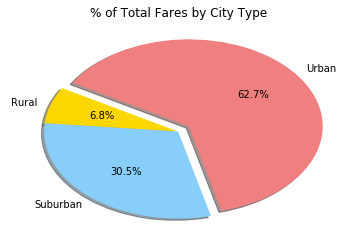

In [5]:
# determine type & fare values
types = df['type'].unique()
types.sort()
fares = df.groupby('type')['fare'].sum()

# configure pie chart & show plot
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.pie(fares, 
        explode=explode, 
        labels=types, 
        colors=colors, 
        shadow=True, 
        startangle=150, 
        autopct='%1.1f%%')
plt.title('% of Total Fares by City Type')
plt.show()


## Total Rides by City Type

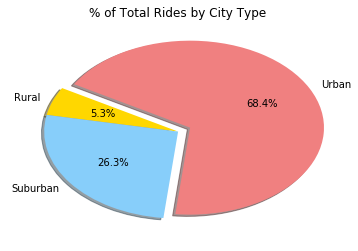

In [6]:
# determine type & fare values
types = df['type'].unique()
types.sort()
rides = df.groupby('type')['ride_id'].count()

# configure pie chart & show plot
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.pie(rides, 
        explode=explode, 
        labels=types, 
        colors=colors, 
        shadow=True, 
        startangle=150, 
        autopct='%1.1f%%')
plt.title('% of Total Rides by City Type')
plt.show()

## Total Drivers by City Type

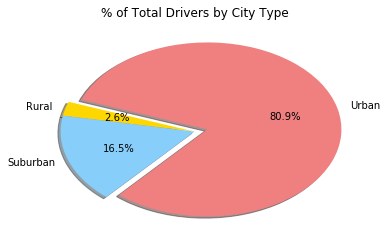

In [7]:
# determine type & fare values
types = citydf['type'].unique()
types.sort()
drivers = citydf.groupby('type')['driver_count'].sum()

# configure pie chart & show plot
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.pie(drivers, 
        explode=explode, 
        labels=types, 
        colors=colors, 
        shadow=True, 
        startangle=160, 
        autopct='%1.1f%%')
plt.title('% of Total Drivers by City Type')
plt.show()